# Naive Bayes Algorithm
<span style="font-size: 12px;">By: Marisol Hernandez</span>

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import norm, bernoulli
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Suppress UndefinedMetricWarning for precision, recall, and F1-score
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

pd.set_option('display.max_columns', None)  # Display all columns

## 1. Introduction to Naive Bayes
**Naive Bayes** is a **<span style="color: red;">classification</span>** algorithm based on Bayes' theorem, which is a statistical technique that uses probability to make predictions. This algorithm is very simple but effective, and it is widely used in various areas of Machine Learning.

The name *Naive* comes from the assumption that all features (predictor variables) in the data set are independent of each other (there is no correlation between them) given the value of the target variable. In other words, this assumption assumes that each characteristic contributes independently to the probability of belonging to a particular class.

### Applications
- Text classfication (e.g. language detection)

- Spam filtering (e.g. spam/not spam)

- Sentiment analysis (e.g. positive/negative/neutral)

- ...and more!

## 2. Bayes' Theorem
**Bayes' theorem** is a fundamental concept in probability that allows us to update our beliefs or probabilities about an event given new evidence. The formula on which this theorem is based is as follows:

$$P(A|B) = \frac{P(B|A)\times P(A)}{P(B)}$$

where:
- $P(A|B)$ is the **posterior probability**: the probability that hypothesis $A$ is true given the data $B$.

- $P(B|A)$ is the **likelihood**: the probability of observing the data $B$ given that hypothesis $A$ is true.

- $P(A)$ is the **prior probability**: the probability that hypothesis $A$ is true before considering the data $B$.

- $P(B)$ is the **marginal likelihood** or **evidence**: the total probability of observing the data $B$ under all possible hypotheses.

This theorem is foundational in Bayesian inference, allowing the update of the probability of a hypothesis as new data becomes available.

### Example
- **Scenario**: Diagnosing a disease given test results.

- **Explanation**: How we can use prior knowledge and new evidence to update our belief about the hypothesis (e.g., having the disease).

## 3. Types of Naive Bayes Classifiers
In `scikit-learn` there are three implementations of this model: `GaussianNB`, `MultinomialNB` and `BernoulliNB`. These implementations differ mainly in the type of data they can handle and the assumptions they make about the distribution of the data.

### 3.1 `GaussianNB`
`GaussianNB` is designed for *continuous* data and assumes that the features follow a Gaussian (normal) distribution. This means that for any feature, given a class, the values of that feature are distributed according to a Gaussian distribution.

#### Gaussian (Normal) Distribution Recap
A normal distribution, also known as a Gaussian distribution, is a continuous probability distribution that is symmetrical and bell-shaped. It is defined by its mean ($\mu$) and standard deviation ($\sigma$), which determine the center and spread of the distribution, respectively.

The general form of its probability density function (PDF):

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Lets plot a Gaussian (Normal) Distribution to identify some of its key properties.

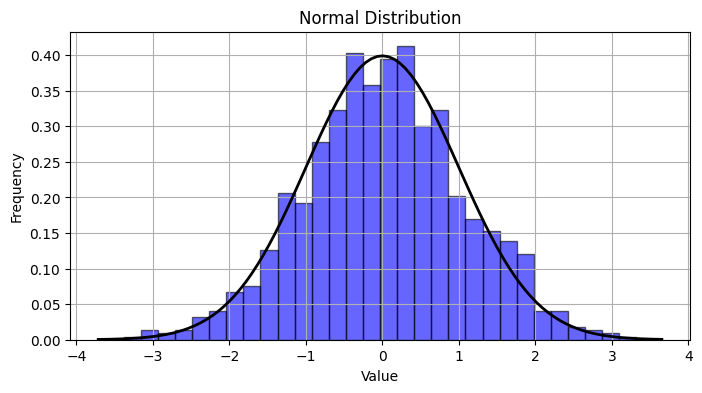

In [68]:
# Generate an array of 1000 random numbers following a normal distribution
mean = 0
std_dev = 1
normal_dist_array = np.random.normal(mean, std_dev, 1000)

# Plot the histogram of the normal distribution
plt.figure(figsize=(8, 4))
plt.hist(normal_dist_array, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean) / std_dev)**2) / (std_dev * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Key properties of a normal distribution:
1. **Symmetry**: The distribution is symmetric about the mean.

2. **Unimodal**: It has a single peak at the mean.

3. **Asymptotic**: The tails approach the horizontal axis but never touch it.

4. **Empirical Rule**: Approximately 68% of the data lies within one standard deviation of the mean, 95% within two, and 99.7% within three.

<p align="center">
  <img src="imgs/gaussian_normal_distribution.png" alt="Alt text" width="700" height="350">
</p>

### Python Code Example
In this example, we'll load the Iris dataset. Again, this dataset has been processed and cleaned with EDA.

In [69]:
# Load data
iris = load_iris()

# Define the labels
labels = iris.target_names

# Create a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable as species names
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].apply(lambda x: labels[x])

# Display the DataFrame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Before we can do a train/test split let's separate our features from our target.

In [70]:
# Separate the features and target
X = iris_df.drop('species', axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
# Separate the features and target
y = iris_df['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

The *train* set will be used to train the model, while the *test* set will be used to evaluate the effectiveness of the model.

In [72]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


Before we go into model initialization and trying, let's demonstrate that for any feature, given a class, the values of that feature are distributed according to a Gaussian distribution.

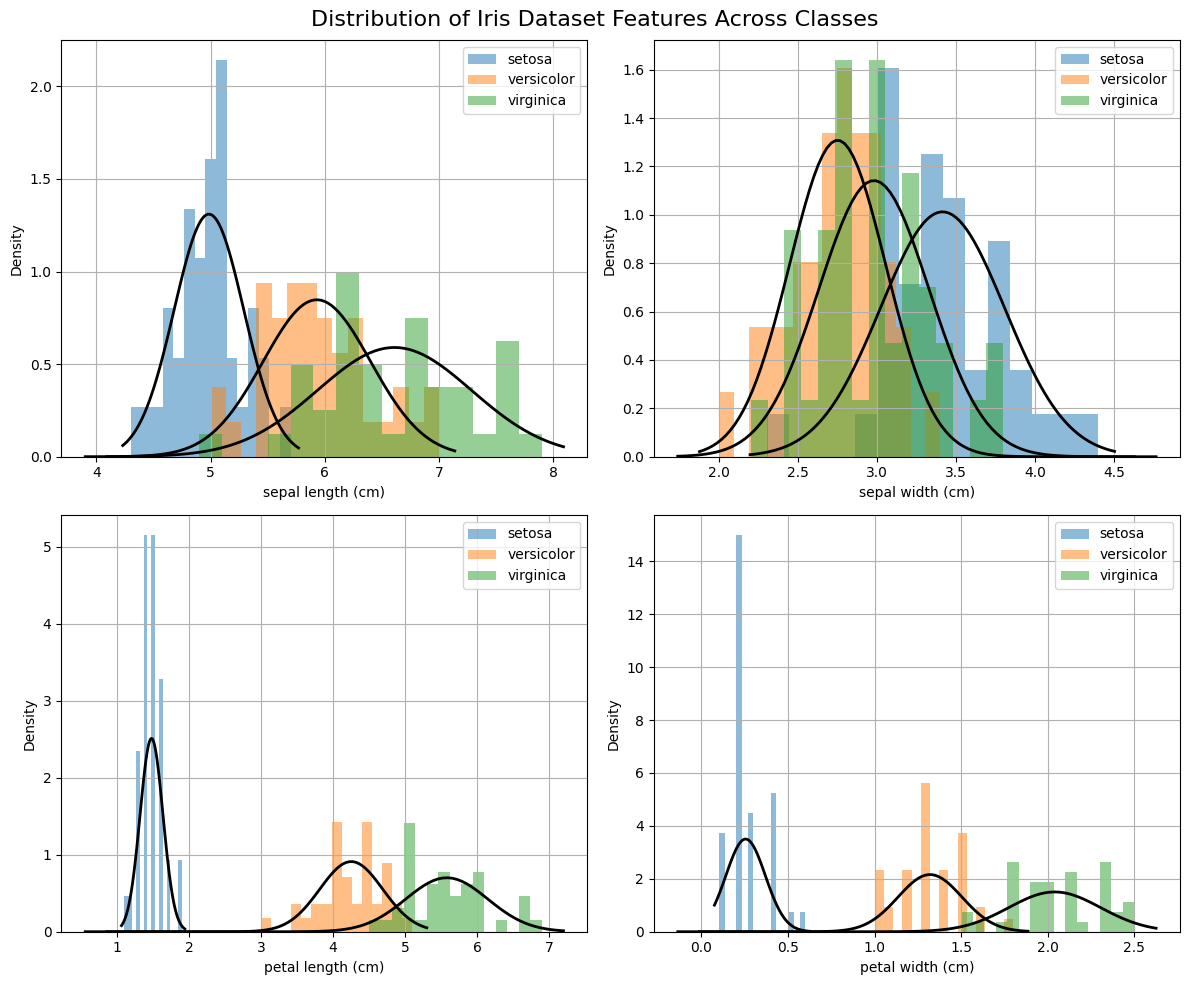

In [73]:
# Set up the figure with a grid layout for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Iris Dataset Features Across Classes', fontsize=16)

# Get feature names and unique class labels
feature_names = iris.feature_names
classes = np.unique(y)

# Iterate over each feature and plot its distribution
for i, ax in enumerate(axes.flatten()):
    feature = feature_names[i]
    
    for class_label in classes:
        # Filter data for current class
        X_class = X_train[y_train == class_label]
        
        # Select feature data
        feature_data = X_class.loc[:, feature]
        
        # Fit a normal distribution to the data
        mu, std = norm.fit(feature_data)
        
        # Plot histogram
        ax.hist(feature_data, bins=15, density=True, alpha=0.5, label=f'{class_label}')
        
        # Plot the fitted Gaussian distribution
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        ax.plot(x, p, 'k', linewidth=2)
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

This gives us clearer visual representation of how well each feature follows a Gaussian distribution within each class of the Iris dataset. This property of the Iris dataset makes it a good candidate for `GaussianNB`.

*Note: `GaussianNB` does not support categorical features because it assumes features are normally distributed. If your dataset includes categorical features, you may need to consider alternative approaches:*

1. **Encode Categorical Features**: Convert categorical features into numeric representations that `GaussianNB` can handle. 

2. **Use Categorical Naive Bayes**: Scikit-learn offers `CategoricalNB`, which is a variant of Naive Bayes that explicitly supports categorical features.

3. **Other Naive Bayes Variants**: There are other variants of Naive Bayes models that can handle different types of features (e.g. `MultinomialNB`)

Now let's initialize and train the model.

In [74]:
# Initialize and train GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

We will use the trained model to make predictions on the test data

In [75]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

test_df = X_test.copy()
test_df["species"] = y_test
test_df["Predictions"] = y_pred
test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Predictions
38,4.4,3.0,1.3,0.2,setosa,setosa
127,6.1,3.0,4.9,1.8,virginica,virginica
57,4.9,2.4,3.3,1.0,versicolor,versicolor
93,5.0,2.3,3.3,1.0,versicolor,versicolor
42,4.4,3.2,1.3,0.2,setosa,setosa


Lets evaluate its performance using accuracy, confusion matrix, and classification report.

In [76]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(cr)

Accuracy: 0.9666666666666667

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



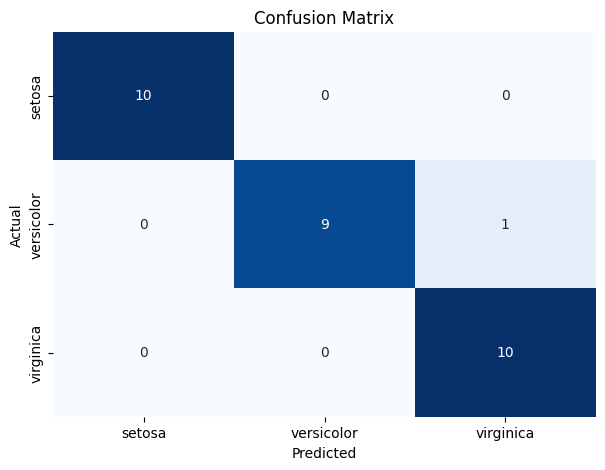

In [77]:
# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3.2 `MultinomialNB`
`MultinomialNB` is suitable for *discrete* data, particularly data that represents *counts* or *frequencies*. This classifier assumes that the features follow a multinomial distribution, which is appropriate for data where the features are counts of occurrences, such as word counts in text classification problems.

### Multinomial Distribution Recap
A multinomial distribution is a generalization of the binomial distribution. It describes the outcome of experiments where each trial results in one of several possible categories, and it models the probability of counts for each category over multiple trials.

The multinomial distribution is defined by two parameters:

- `n`: The number of trials

- `p`: A vector of probabilities associated with each of the possible outcomes.

The probability mass function (PMF) of the multinomial distribution for outcomes $x_1, x_2, ..., x_k$ is given by:

$$P(X_1=x_1, X_2=x_2, ..., X_k=x_k) = \frac{n!}{x_1!x_2!...x_k!}p_1^{x_1}p_2^{x_2}...p_k^{x_k}$$

Let's plot a multinomial distribution to identify some of its key properties.

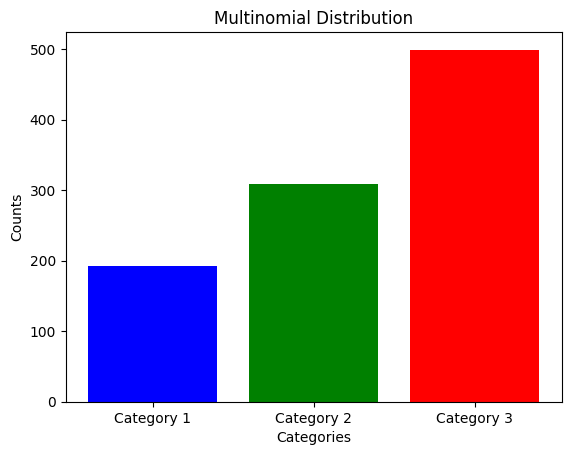

In [78]:
# Parameters for the multinomial distribution
n_trials = 1000  # number of trials
probabilities = [0.2, 0.3, 0.5]  # probabilities for each outcome

# Generate data following a multinomial distribution
data = np.random.multinomial(n_trials, probabilities, size=1)[0]

# Plot the data
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, data, color=['blue', 'green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Multinomial Distribution')
plt.show()


Key properties of a multinomial distribution:

1. **Discrete**: The multinomial distribution deals with discrete outcomes, counting the number of times each category occurs in a fixed number of trials.

2. **Categorical**: It is used for experiments with more than two possible outcomes, making it a generalization of the binomial distribution.

3. **Probability Vector**: The sum of the probabilities for all categories must equal 1 ($\sum{p_i} = 1$)

4. **Independent Trials**: Each trial is independent, and the probability of each category remains constant throughout the trials.

### Python Code Example
In this example, we'll use `MultinomialNB` for text classification. First let's gather our data.

In [80]:
# Example text documents
documents = [
    'I love programming programming in Python.',
    'Python is great for data science',
    'I enjoy long walks on the beach.',
    'Data science is fascinating.',
    'I love data and programming programming.',
    'I need to sleep.',
    'I have not been to the beach in in forever.',
    'I love to sleep.',
    'I love love programming.',
    'Python Python is is fascinating!'
]

# Corresponding labels
labels = ['tech', 'tech', 'non-tech', 'tech', 'tech', 'non-tech', 'non-tech', 'non-tech', 'tech', 'tech']

# Put the reviews and labels in a DataFrame
df = pd.DataFrame({
    "comment": documents,
    "label": labels,
})
df

,comment,label
0,I love programming programming in Python.,tech
1,Python is great for data science,tech
2,I enjoy long walks on the beach.,non-tech
3,Data science is fascinating.,tech
4,I love data and programming programming.,tech
5,I need to sleep.,non-tech
6,I have not been to the beach in in forever.,non-tech
7,I love to sleep.,non-tech
8,I love love programming.,tech
9,Python Python is is fascinating!,tech


In [81]:
# Removing spaces and converting the text to lowercase
df["comment"] = df["comment"].str.strip().str.lower()
df

,comment,label
0,i love programming programming in python.,tech
1,python is great for data science,tech
2,i enjoy long walks on the beach.,non-tech
3,data science is fascinating.,tech
4,i love data and programming programming.,tech
5,i need to sleep.,non-tech
6,i have not been to the beach in in forever.,non-tech
7,i love to sleep.,non-tech
8,i love love programming.,tech
9,python python is is fascinating!,tech


Before we can do a train/test split let's separate our features from our target.

In [82]:
# Separate the features and target
X = df['comment']
X

0      i love programming programming in python.
1               python is great for data science
2               i enjoy long walks on the beach.
3                   data science is fascinating.
4       i love data and programming programming.
5                               i need to sleep.
6    i have not been to the beach in in forever.
7                               i love to sleep.
8                       i love love programming.
9               python python is is fascinating!
Name: comment, dtype: object

In [83]:
# Separate the features and target
y = df['label']
y

0        tech
1        tech
2    non-tech
3        tech
4        tech
5    non-tech
6    non-tech
7    non-tech
8        tech
9        tech
Name: label, dtype: object

The *train* set will be used to train the model, while the *test* set will be used to evaluate the effectiveness of the model.

In [84]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8,)
y_train shape: (8,)
X_test shape: (2,)
y_test shape: (2,)


In text classification, documents are often represented as a bag of words. This means that each document is transformed into a vector where each element represents the count of a particular word in the document.

Each document is converted into a vector of word counts using techniques like `CountVectorizer`.

In [85]:
vec_model = CountVectorizer()
X_train_count = vec_model.fit_transform(X_train).toarray()
X_train_count

array([[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]])

In [86]:
# Convert the array to a DataFrame
X_train_count_df = pd.DataFrame(X_train_count, columns=vec_model.get_feature_names_out())
X_train_count_df

,and,beach,data,enjoy,fascinating,for,great,in,is,long,love,need,on,programming,python,science,sleep,the,to,walks
0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,1,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,1,0,0,2,1,0,0,0,0,0
7,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


The multinomial distribution is a natural fit for this kind of data because it models the counts of different outcomes (words) in a fixed number of trials (words in the document). The parameters of the multinomial distribution in this context are:

- `n`: The total number of words in the document.

- `p`: The probability of each word in the vocabulary occurring in the document.

`MultinomialNB` leverages the multinomial distribution to estimate the probability of each word given each class. This is the likelihood $P(\text{word}_i|\text{class}_j)$ which is computed using the word counts in the training documents of each class. During prediction, `MultinomialNB` uses Bayes' theorem to compute the posterior probability of each class given a document's word counts. The class with the highest posterior probability is chosen as the predicted class.

Let's not forget to transform `X_test`!

In [87]:
X_test_count = vec_model.transform(X_test).toarray()

# Convert the array to a DataFrame
X_test_count_df = pd.DataFrame(X_test_count, columns=vec_model.get_feature_names_out())
X_test_count_df

,and,beach,data,enjoy,fascinating,for,great,in,is,long,love,need,on,programming,python,science,sleep,the,to,walks
0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


Now let's initialize and train the model. Note that we are training the model with the array of word count vectors, `X_train_count`.

In [88]:
# Initialize and train MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

We will use the trained model to make predictions on the test data. 

Note that we make predictions using the array of word count vectors for the test points, `X_test_count`.

In [89]:
# Predict the labels for the test set
y_pred = model.predict(X_test_count)

test_df = pd.DataFrame({
    "comment": X_test,
    "label": y_test,
    "Predictions": y_pred,
})
test_df.head()

,comment,label,Predictions
6,i have not been to the beach in in forever.,non-tech,non-tech
3,data science is fascinating.,tech,tech


Lets evaluate its performance using accuracy, confusion matrix, and classification report.

In [90]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(cr)

Accuracy: 1.0

Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

    non-tech       1.00      1.00      1.00         1
        tech       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



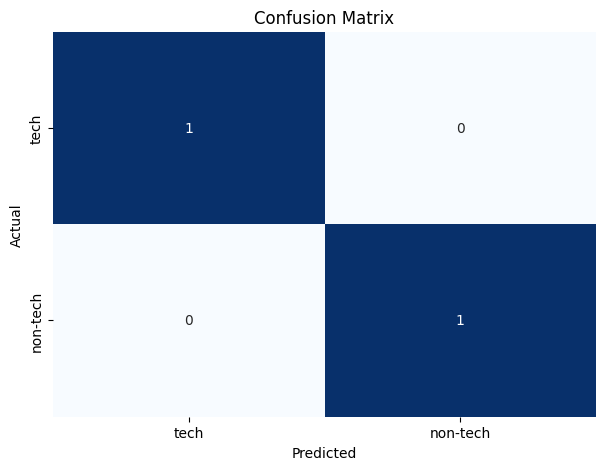

In [91]:
# Plot confusion matrix
labels = y.unique()
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*Note: Categorical features can be included in a `MultinomialNB` model by transforming them into a suitable numerical format, such as one-hot encoding.*

### 3.3 `BernoulliNB`
`BernoulliNB` is designed for binary/boolean features and assumes that the features are binary-valued (0 or 1). This classifier is suitable for data where each feature represents the presence or absence of a characteristic.

#### Bernoulli Distribution Recap
A Bernoulli distribution is a discrete probability distribution for a random variable that takes value 1 with probability $p$ and value 0 with probability $1 - p$. It is a special case of the binomial distribution where a single trial is conducted.

The probability mass function (PMF) for a Bernoulli distribution is:

$$P(X=x) = p^x(1-p)^{1-x}$$

where:

- $x$ is a binary outcome (0 or 1).

- $p$ is the probability of the outcome being 1.

Let's plot a Bernoulli distribution to visualize its properties:

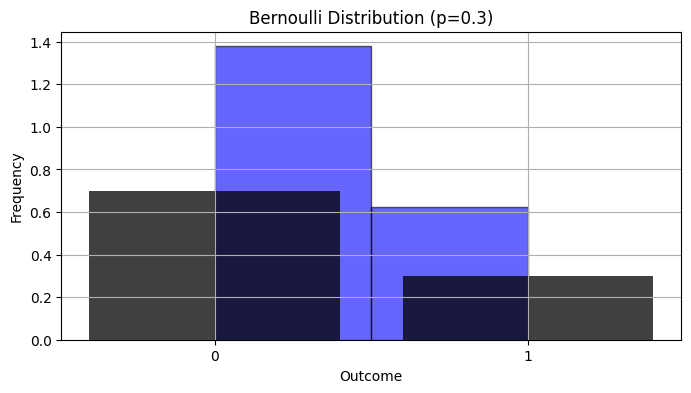

In [92]:
# Probability of success (p)
p = 0.3

# Generate an array of 1000 random numbers following a Bernoulli distribution
bernoulli_dist_array = bernoulli.rvs(p, size=1000)

# Plot the histogram of the Bernoulli distribution
plt.figure(figsize=(8, 4))
plt.hist(bernoulli_dist_array, bins=2, density=True, alpha=0.6, color='b', edgecolor='black')

# Plot the Bernoulli distribution
x = [0, 1]
pmf = [1 - p, p]
plt.bar(x, pmf, color='k', alpha=0.75)

plt.title('Bernoulli Distribution (p=0.3)')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.grid(True)
plt.show()

Key properties of a Bernoulli distribution:

1. **Binary Outcomes**: The distribution models two possible outcomes: success (1) and failure (0).

2. **Parameter** $p$: The distribution is defined by a single parameter $p$, which is the probability of success.


### Python Code Example
We'll use a dataset of movie reviews, where each review is classified as either "positive" or "negative". We'll convert the text data into binary features and train a `BernoulliNB` model to classify the reviews.

In [93]:
# Example movie reviews
reviews = [
    "I love this movie, it's fantastic!",
    "The movie was terrible and boring.",
    "What a great film, I enjoyed it.",
    "I didn't like the movie at all.",
    "Amazing movie, will watch again.",
    "Not my type, I won't recommend it.",
    "Fantastic movie with great actors.",
    "It was a waste of time.",
    "Love the storyline and the characters.",
    "Not good, very disappointing."
]

# Corresponding labels
labels = ['positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative']

# Create a DataFrame
df = pd.DataFrame({"review": reviews, "label": labels})
df

,review,label
0,"I love this movie, it's fantastic!",positive
1,The movie was terrible and boring.,negative
2,"What a great film, I enjoyed it.",positive
3,I didn't like the movie at all.,negative
4,"Amazing movie, will watch again.",positive
5,"Not my type, I won't recommend it.",negative
6,Fantastic movie with great actors.,positive
7,It was a waste of time.,negative
8,Love the storyline and the characters.,positive
9,"Not good, very disappointing.",negative


In [94]:
df["review"] = df["review"].str.strip().str.lower()  # Clean text data
df

,review,label
0,"i love this movie, it's fantastic!",positive
1,the movie was terrible and boring.,negative
2,"what a great film, i enjoyed it.",positive
3,i didn't like the movie at all.,negative
4,"amazing movie, will watch again.",positive
5,"not my type, i won't recommend it.",negative
6,fantastic movie with great actors.,positive
7,it was a waste of time.,negative
8,love the storyline and the characters.,positive
9,"not good, very disappointing.",negative


Before we can do a train/test split let's separate our features from our target.

In [95]:
X = df['review']
X

0        i love this movie, it's fantastic!
1        the movie was terrible and boring.
2          what a great film, i enjoyed it.
3           i didn't like the movie at all.
4          amazing movie, will watch again.
5        not my type, i won't recommend it.
6        fantastic movie with great actors.
7                   it was a waste of time.
8    love the storyline and the characters.
9             not good, very disappointing.
Name: review, dtype: object

In [96]:
y = df['label']
y

0    positive
1    negative
2    positive
3    negative
4    positive
5    negative
6    positive
7    negative
8    positive
9    negative
Name: label, dtype: object

The *train* set will be used to train the model, while the *test* set will be used to evaluate the effectiveness of the model.

In [97]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8,)
y_train shape: (8,)
X_test shape: (2,)
y_test shape: (2,)


Here, `CountVectorizer` is initialized with `binary=True`. This parameter configures `CountVectorizer` to use a binary representation of the token counts.

In [98]:
# Vectorize text data with binary (boolean) representation
vec_model = CountVectorizer(binary=True)
X_train_count = vec_model.fit_transform(X_train).toarray()
X_train_count

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1]])

**Binary Representation:** Each token (word) in the vocabulary of the corpus is represented as either 0 or 1, indicating its absence (0) or presence (1) in the document being vectorized.

In [99]:
# Convert the array to a DataFrame
X_train_count_df = pd.DataFrame(X_train_count, columns=vec_model.get_feature_names_out())
X_train_count_df

,actors,again,all,amazing,and,at,boring,didn,disappointing,enjoyed,fantastic,film,good,great,it,like,love,movie,my,not,recommend,terrible,the,this,type,very,was,watch,what,will,with,won
0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1


Let's not forget to transform `X_test`!

In [100]:
X_test_count = vec_model.transform(X_test).toarray()

# Convert the array to a DataFrame
X_test_count_df = pd.DataFrame(X_test_count, columns=vec_model.get_feature_names_out())
X_test_count_df

,actors,again,all,amazing,and,at,boring,didn,disappointing,enjoyed,fantastic,film,good,great,it,like,love,movie,my,not,recommend,terrible,the,this,type,very,was,watch,what,will,with,won
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Now let's initialize and train the model. Note that we are training the model with the array of word count vectors, `X_train_count`.

In [101]:
# Initialize and train BernoulliNB
model = BernoulliNB()
model.fit(X_train_count, y_train)

BernoulliNB()

We will use the trained model to make predictions on the test data. 

Note that we make predictions using the array of word count vectors for the test points, `X_test_count`.

In [102]:
# Predict the labels for the test set
y_pred = model.predict(X_test_count)

test_df = pd.DataFrame({
    "review": X_test,
    "label": y_test,
    "Predictions": y_pred,
})
test_df.head()

,review,label,Predictions
7,it was a waste of time.,negative,negative
8,love the storyline and the characters.,positive,negative


Lets evaluate its performance using accuracy, confusion matrix, and classification report.

In [103]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(cr)

Accuracy: 0.5

Confusion Matrix:
[[1 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



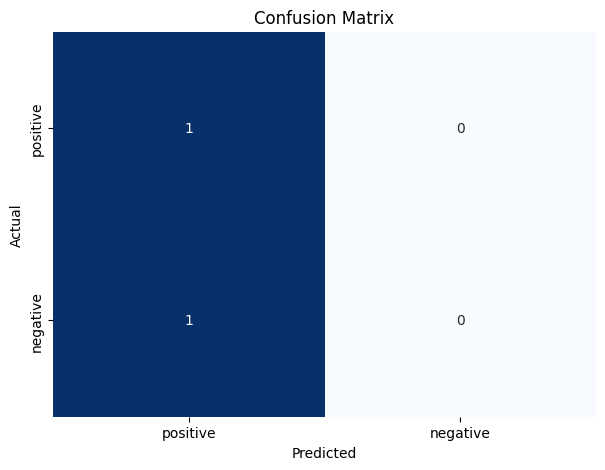

In [104]:
# Plot confusion matrix
labels = y.unique()
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

`BernoulliNB` in scikit-learn is specifically designed for binary/boolean features, which makes it less suitable for directly handling categorical features that are not inherently binary. However, there are strategies to preprocess categorical features so they can be used with `BernoulliNB`:

1. **One-Hot Encoding**: Convert each categorical feature into a set of binary features, where each feature represents a unique category.

## 4. Comparison of Naive Bayes Classifiers

<p align="center">
  <img src="imgs/naive_bayes_algo1.png" alt="Alt text" width="950" height="200">
</p>

If you have both numerical and categorical features in your data, there are different strategies, but the best one to preserve the usefulness and suitability of this model is to transform the categorical ones into numerical ones using coding techniques, as we have seen before: `pd.factorize` of `Pandas`